In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('/content/bitcoindata.csv')

In [5]:
df.head()

,timestamp,Open,Highest price,Lowest price,Closing price,Volume of transaction
0,1609430000000,28782.01,28821.85,28763.94,28811.85,95.835795
1,1609430000000,28812.64,28822.59,28714.29,28726.62,58.516227
2,1609430000000,28728.28,28744.76,28684.69,28693.37,75.038373
3,1609430000000,28693.37,28715.15,28682.09,28690.29,37.128193
4,1609430000000,28690.29,28734.70,28680.00,28715.11,38.411112


In [6]:
df.tail()

,timestamp,Open,Highest price,Lowest price,Closing price,Volume of transaction
487162,1638720000000,47922.76,47996.00,47907.21,47989.99,64.31124
487163,1638720000000,47990.00,48000.00,47933.44,47946.65,71.66986
487164,1638720000000,47946.65,47992.39,47900.00,47980.24,50.81992
487165,1638720000000,47980.25,47980.99,47902.58,47912.90,41.79408
487166,1638720000000,47925.87,47972.08,47878.35,47951.57,43.85110


In [7]:
#Data preprocessing

In [8]:
projection = 25 #projection variable for number of days to predict 

In [9]:
#Heatmap to see the correlation between features(how much they are dependent on each other)

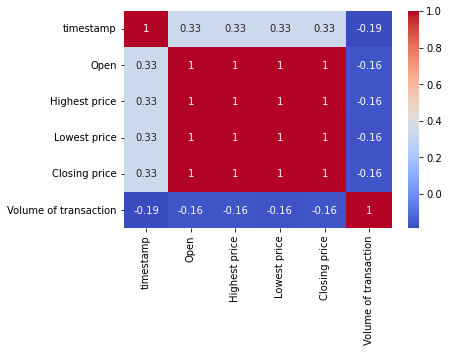

In [10]:
sns.heatmap(df.corr(),annot= True, cmap= 'coolwarm')

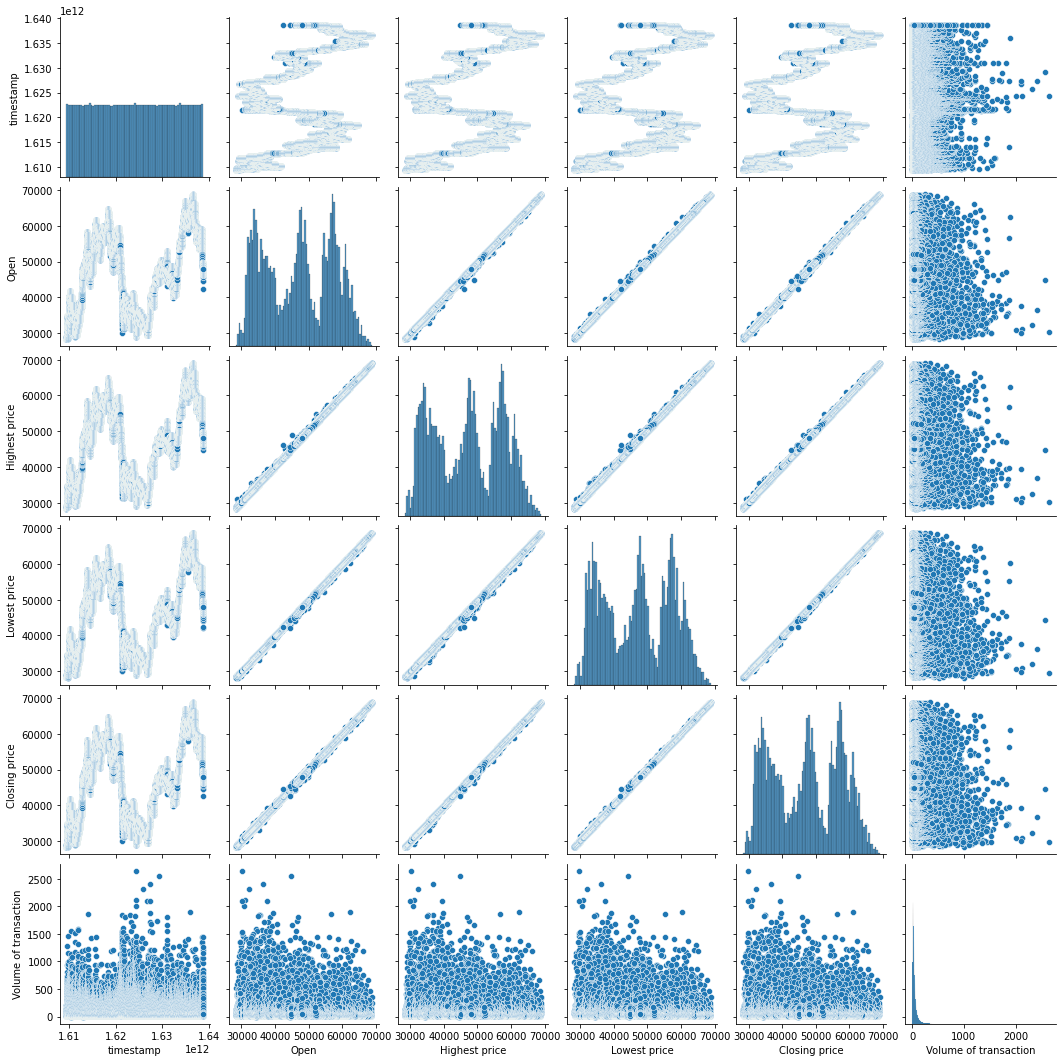

In [11]:
sns.pairplot(data= df)

In [12]:
#Drop the column volume btc and timestamp as they are not highly correlated
df_2= df.drop(columns= ['timestamp', 'Volume of transaction'])

In [13]:
df_2['Prediction'] = df_2[['Closing price']].shift(-projection)

In [14]:
df_2

,Open,Highest price,Lowest price,Closing price,Prediction
0,28782.01,28821.85,28763.94,28811.85,28728.06
1,28812.64,28822.59,28714.29,28726.62,28726.62
2,28728.28,28744.76,28684.69,28693.37,28716.15
3,28693.37,28715.15,28682.09,28690.29,28678.78
4,28690.29,28734.70,28680.00,28715.11,28641.22
...,...,...,...,...,...
487162,47922.76,47996.00,47907.21,47989.99,NaN
487163,47990.00,48000.00,47933.44,47946.65,NaN
487164,47946.65,47992.39,47900.00,47980.24,NaN
487165,47980.25,47980.99,47902.58,47912.90,NaN


In [15]:
#Feature extraction (to get a single column to work on)
#Independent variable dataset
x = np.array(df_2[['Closing price']])
x = x[:-projection] 
print(x)

[[28811.85]
 [28726.62]
 [28693.37]
 ...
 [48202.06]
 [48156.57]
 [48176.84]]


In [16]:
#dependent variable dataset
y = df_2['Prediction'].values
y = y[:-projection]
print(y)

[28728.06 28726.62 28716.15 ... 47980.24 47912.9  47951.57]


In [17]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size = 0.20)

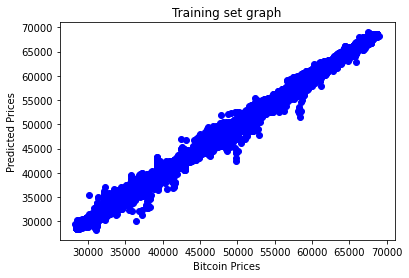

In [18]:
plt.scatter(x_train, y_train, color= "blue")
plt.title("Training set graph")
plt.xlabel("Bitcoin Prices")
plt.ylabel("Predicted Prices")
plt.show()

In [19]:
#training the Linear regression model
linreg= LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [20]:
#testing the model
linreg_confidense= linreg.score(x_test, y_test)
print("Model prediction accuracy=", linreg_confidense)

Model prediction accuracy= 0.9992332533001306


In [21]:
linreg_prediction = linreg.predict(x_test)
linreg_prediction

array([59115.65981524, 58648.07308346, 48200.57822864, ...,
       44303.39574953, 45622.0642994 , 35145.22282969])

In [22]:
y_test

array([59091.52, 58773.82, 48619.83, ..., 44236.62, 45690.67, 35142.15])

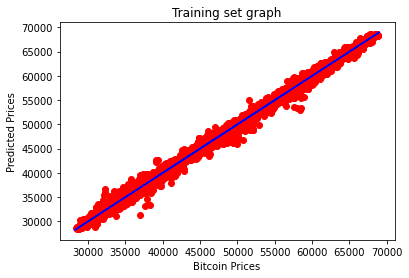

In [23]:
plt.scatter(x_test, y_test, color="red")
plt.plot(x_train, linreg.predict(x_train), color= "blue")
plt.title("Training set graph")
plt.xlabel("Bitcoin Prices")
plt.ylabel("Predicted Prices")
plt.show()

-----------------------------------

In [24]:
#training the Decision tree
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size = 0.20)
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [25]:
dtree_confidense = dtree.score(x_test, y_test)
print("Decision tree confidence is", dtree_confidense)

Decision tree confidence is 0.998521040240899


In [26]:
dtree_prediction = dtree.predict(x_test)
dtree_prediction

array([33133.84, 47626.62, 33591.23, ..., 44538.38, 51909.94, 50994.31])

In [27]:
y_test

array([33458.33, 47307.42, 33722.74, ..., 44833.59, 53685.28, 50718.85])

In [28]:
#Linear regression predictions
linreg_prediction = linreg.predict(x_test)
print(linreg_prediction)

[33221.87007876 47347.17746822 33601.28702514 ... 44469.57995223
 53205.50546084 50925.76525968]


In [29]:
#decision tree predictions
dtree_prediction = dtree.predict(x_test)
print(dtree_prediction)

[33133.84 47626.62 33591.23 ... 44538.38 51909.94 50994.31]


In [30]:
print("Linear regression Model prediction accuracy=", linreg_confidense)
print("Decision tree model prediction accuracy=", dtree_confidense)

Linear regression Model prediction accuracy= 0.9992332533001306
Decision tree model prediction accuracy= 0.998521040240899


------

In [31]:
projection_2 = 2500

In [32]:
df_3 = df.drop(columns= ['timestamp', 'Volume of transaction'])

In [33]:
df_3['Predictions'] = df_3[['Closing price']].shift(-projection_2)

In [34]:
df_3

,Open,Highest price,Lowest price,Closing price,Predictions
0,28782.01,28821.85,28763.94,28811.85,29733.31
1,28812.64,28822.59,28714.29,28726.62,29736.42
2,28728.28,28744.76,28684.69,28693.37,29725.76
3,28693.37,28715.15,28682.09,28690.29,29740.00
4,28690.29,28734.70,28680.00,28715.11,29758.47
...,...,...,...,...,...
487162,47922.76,47996.00,47907.21,47989.99,NaN
487163,47990.00,48000.00,47933.44,47946.65,NaN
487164,47946.65,47992.39,47900.00,47980.24,NaN
487165,47980.25,47980.99,47902.58,47912.90,NaN


In [35]:
#independent variable
a = np.array(df_3[['Closing price']])
a = a[:-projection_2]
print(a)

[[28811.85]
 [28726.62]
 [28693.37]
 ...
 [53399.47]
 [53483.05]
 [53527.81]]


In [36]:
#dependent variable
b = df_3['Predictions'].values
b = b[:-projection_2]
print(b)

[29733.31 29736.42 29725.76 ... 47980.24 47912.9  47951.57]


In [37]:
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.20)

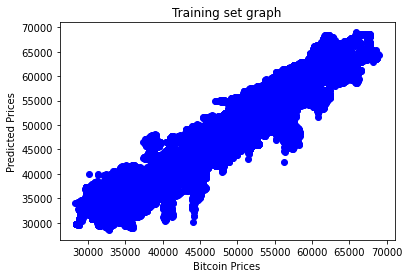

In [38]:
plt.scatter(a_train, b_train, color= "blue")
plt.title("Training set graph")
plt.xlabel("Bitcoin Prices")
plt.ylabel("Predicted Prices")
plt.show()

In [39]:
#training the Linear regression model
linreg= LinearRegression()
linreg.fit(a_train, b_train)

LinearRegression()

In [40]:
#testing the model
linreg_confidense2= linreg.score(a_test, b_test)
print("Model prediction accuracy=", linreg_confidense2)

Model prediction accuracy= 0.937435700334785


In [41]:
linreg_prediction2 = linreg.predict(a_test)
linreg_prediction2

array([60018.62762359, 48117.60329707, 46294.70845967, ...,
       55612.53782883, 34362.90127367, 41929.67208517])

In [42]:
b_test

array([56618.99, 51100.36, 43339.39, ..., 50807.5 , 33050.01, 43005.13])

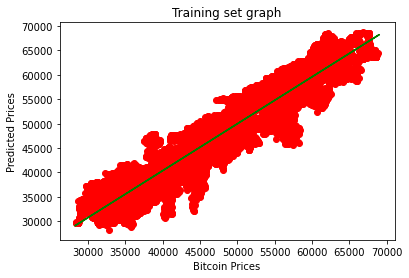

In [43]:
plt.scatter(a_test, b_test, color="red")
plt.plot(a_train, linreg.predict(a_train), color= "green")
plt.title("Training set graph")
plt.xlabel("Bitcoin Prices")
plt.ylabel("Predicted Prices")
plt.show()

In [44]:
#training the Decision tree
a_train, a_test, b_train , b_test = train_test_split(a,b, test_size = 0.20)
dtree = DecisionTreeRegressor()
dtree.fit(a_train, b_train)

DecisionTreeRegressor()

In [45]:
dtree_confidense2 = dtree.score(a_test, b_test)
print("Decision tree confidence is", dtree_confidense2)

Decision tree confidence is 0.8901454167827005


In [46]:
dtree_prediction2 = dtree.predict(a_test)
dtree_prediction2

array([46411.74, 40475.14, 63940.14, ..., 63192.  , 41941.42, 62330.64])

In [47]:
b_test

array([35904.81, 40302.65, 64471.08, ..., 61029.22, 50086.44, 64447.32])

In [48]:
#Linear regression predictions
linreg_prediction2 = linreg.predict(a_test)
print(linreg_prediction)

[33221.87007876 47347.17746822 33601.28702514 ... 44469.57995223
 53205.50546084 50925.76525968]


In [49]:
#decision tree predictions
dtree_prediction2 = dtree.predict(a_test)
print(dtree_prediction)

[33133.84 47626.62 33591.23 ... 44538.38 51909.94 50994.31]


In [50]:
print("Linear regression Model prediction accuracy=", linreg_confidense2)
print("Decision tree model prediction accuracy=", dtree_confidense2)

Linear regression Model prediction accuracy= 0.937435700334785
Decision tree model prediction accuracy= 0.8901454167827005


In [55]:
X = np.array(df_2.drop(['Prediction'], 1))[:-projection]
print(X)

[[28782.01 28821.85 28763.94 28811.85]
 [28812.64 28822.59 28714.29 28726.62]
 [28728.28 28744.76 28684.69 28693.37]
 ...
 [48139.29 48298.74 48126.57 48202.06]
 [48202.07 48267.39 48156.57 48156.57]
 [48156.58 48238.41 48055.   48176.84]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [56]:
pred = dtree_prediction2
valid = df[X.shape[0]:]
valid['Predictions'] = pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Closing price'])
plt.plot(valid[['Closing price', 'Predictions']])
plt.legend(['Orig','Val','Pred'])

ValueError: ignored